In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)
%matplotlib inline

In [2]:
# Importing train and test dataset

train_data = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/Naive Bayes/Assignment/SalaryData_Train.csv')
test_data = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/Naive Bayes/Assignment/SalaryData_Test.csv')

In [3]:
# Checking rows and shape in train dataset
train_data.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [4]:
# Checking rows and shape in test dataset
test_data.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [5]:
train_data.shape, test_data.shape

((30161, 14), (15060, 14))

In [6]:
# Features in train and test dataset
train_data.columns,test_data.columns

(Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
        'occupation', 'relationship', 'race', 'sex', 'capitalgain',
        'capitalloss', 'hoursperweek', 'native', 'Salary'],
       dtype='object'),
 Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
        'occupation', 'relationship', 'race', 'sex', 'capitalgain',
        'capitalloss', 'hoursperweek', 'native', 'Salary'],
       dtype='object'))

In [7]:
# Info of train and test dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
# Checking for null values
train_data.isnull().sum(),test_data.isnull().sum()

(age              0
 workclass        0
 education        0
 educationno      0
 maritalstatus    0
 occupation       0
 relationship     0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64,
 age              0
 workclass        0
 education        0
 educationno      0
 maritalstatus    0
 occupation       0
 relationship     0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64)

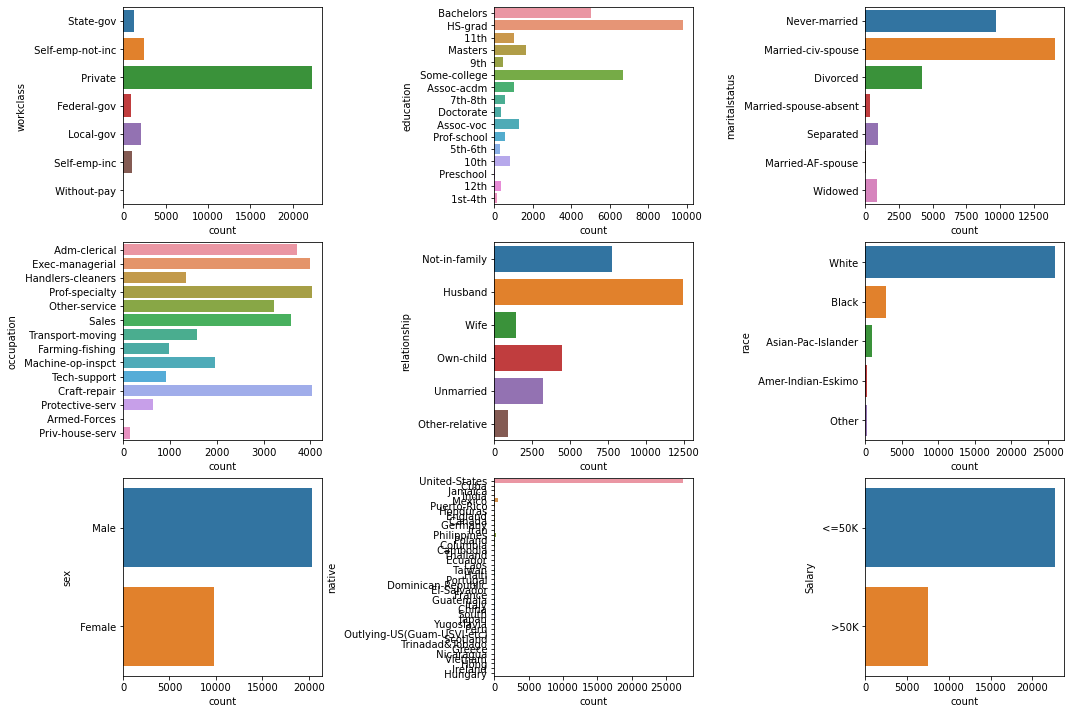

In [10]:
# Countplot of categorical data

figure,axes = plt.subplots(3,3,figsize=(15,10))
index = 0
axes = axes.flatten()
Cat_data = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']

for i in Cat_data:
    sns.countplot(y = train_data[i],ax=axes[index])
    index +=1
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=1)

In [11]:
# Checking native feature values
train_data.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

#### Observations:
    1. Majority of people are from Private Working Class, having different occupations
    2. Large population belongs to US hence White people can be seen more
    3. Male count is more 
    4. Majority of people have salaries less than <= 50K

In [12]:
# Salaries based on sex
train_data.sex.groupby(train_data.Salary).value_counts()

Salary  sex    
 <=50K   Male      13984
         Female     8669
 >50K    Male       6396
         Female     1112
Name: sex, dtype: int64

In [13]:
# Salaries based on race
train_data.race.groupby(train_data.Salary).value_counts()

Salary  race               
 <=50K   White                 19093
         Black                  2451
         Asian-Pac-Islander      647
         Amer-Indian-Eskimo      252
         Other                   210
 >50K    White                  6839
         Black                   366
         Asian-Pac-Islander      248
         Amer-Indian-Eskimo       34
         Other                    21
Name: race, dtype: int64

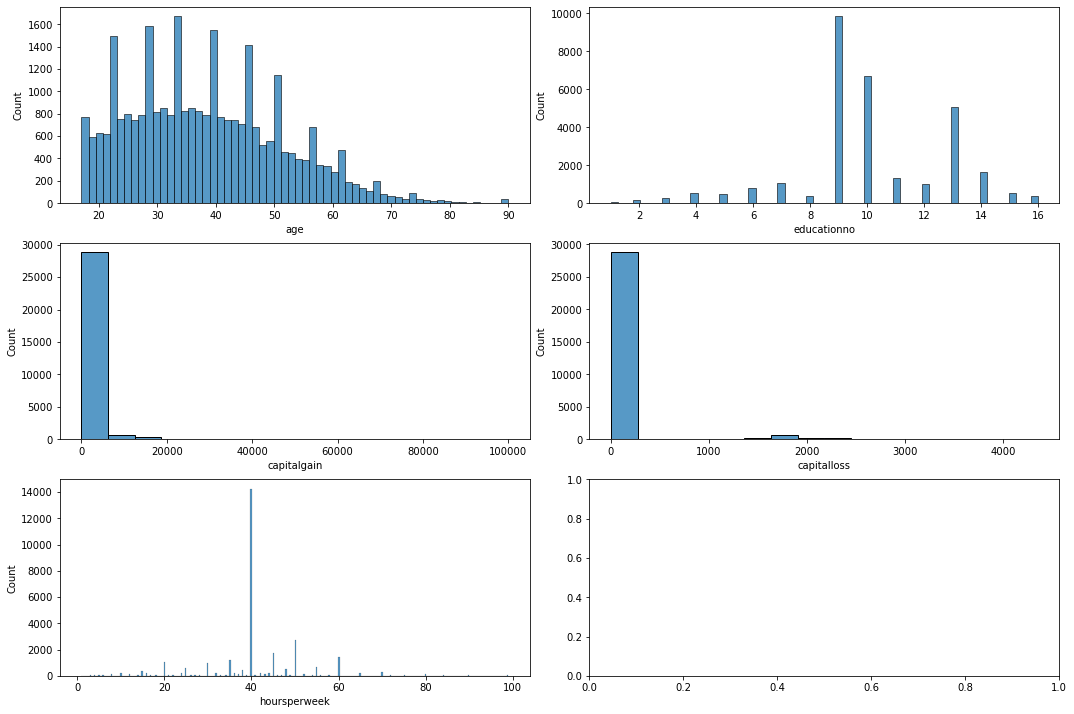

In [14]:
# Histogram for numerical data

figure,axes = plt.subplots(3,2,figsize=(15,10))
index = 0
axes = axes.flatten()
Num_train_data = ['age','educationno','capitalgain','capitalloss','hoursperweek']

for i in Num_train_data:
    sns.histplot(data = train_data[i],ax=axes[index])
    index +=1
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=1)

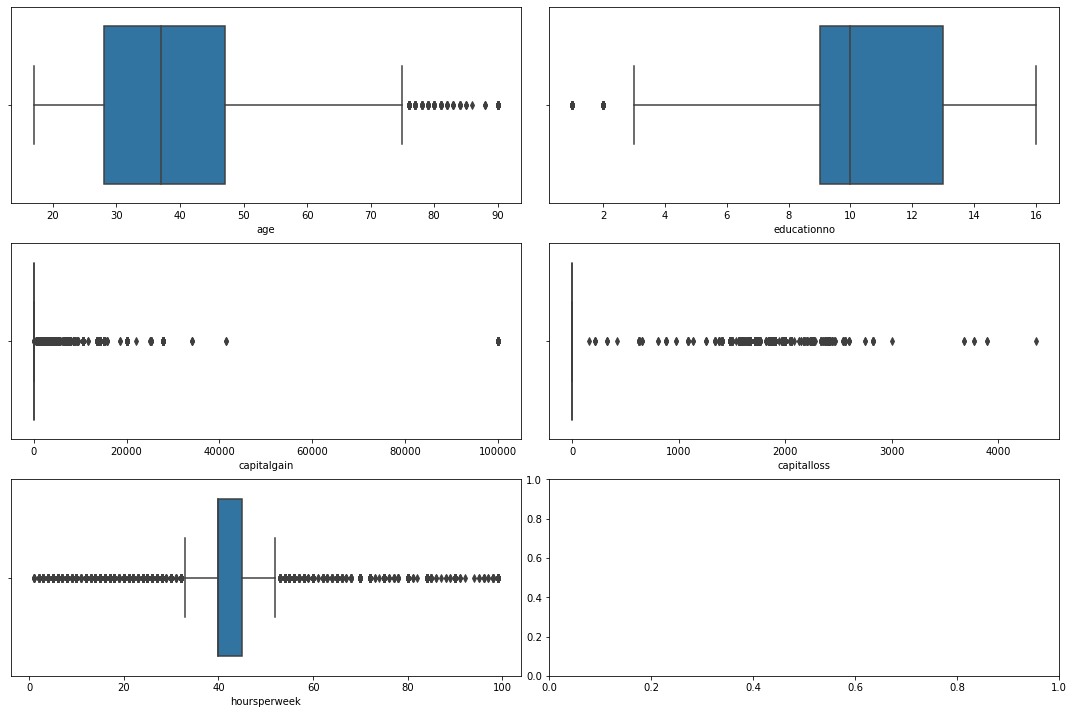

In [15]:
# Checking Boxplot for outliers

figure,axes = plt.subplots(3,2,figsize=(15,10))
index = 0
axes = axes.flatten()
Num_train_data = ['age','educationno','capitalgain','capitalloss','hoursperweek']

for i in Num_train_data:
    sns.boxplot(train_data[i],ax=axes[index])
    index +=1
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=1)

In [16]:
# Converting training categorical data into numerical 

Cat_train_data = train_data[Cat_data[:-1]]

dum_train_data = pd.get_dummies(Cat_train_data,drop_first=True)

In [17]:
dum_train_data

workclass_ Local-gov  workclass_ Private  workclass_ Self-emp-inc  \
0                         0                   0                        0   
1                         0                   0                        0   
2                         0                   1                        0   
3                         0                   1                        0   
4                         0                   1                        0   
...                     ...                 ...                      ...   
30156                     0                   1                        0   
30157                     0                   1                        0   
30158                     0                   1                        0   
30159                     0                   1                        0   
30160                     0                   0                        1   

       workclass_ Self-emp-not-inc  workclass_ State-gov  \
0                                0                     1   
1                                1                     0   
2                                0                     0   
3                                0                     0   
4                                0                     0   
...                            ...                   ...   
30156                            0                     0   
30157                            0                     0   
30158                            0                     0   
30159                            0                     0   
30160                            0                     0   

       workclass_ Without-pay  education_ 11th  education_ 12th  \
0                           0                0                0   
1                           0                0                0   
2                           0                0                0   
3                           0                1                0   
4                           0                0                0   
...                       ...              ...              ...   
30156                       0                0                0   
30157                       0                0                0   
30158                       0                0                0   
30159                       0                0                0   
30160                       0                0                0   

       education_ 1st-4th  education_ 5th-6th  ...  native_ Portugal  \
0                       0                   0  ...                 0   
1                       0                   0  ...                 0   
2                       0                   0  ...                 0   
3                       0                   0  ...                 0   
4                       0                   0  ...                 0   
...                   ...                 ...  ...               ...   
30156                   0                   0  ...                 0   
30157                   0                   0  ...                 0   
30158                   0                   0  ...                 0   
30159                   0                   0  ...                 0   
30160                   0                   0  ...                 0   

       native_ Puerto-Rico  native_ Scotland  native_ South  native_ Taiwan  \
0                        0                 0              0               0   
1                        0                 0              0               0   
2                        0                 0              0               0   
3                        0                 0              0               0   
4                        0                 0              0               0   
...                    ...               ...            ...             ...   
30156                    0                 0              0               0   
30157                    0                 0              0            

In [18]:
# Converting testing categorical data into numerical 

Cat_test_data = test_data[Cat_data[:-1]]

dum_test_data = pd.get_dummies(Cat_test_data,drop_first=True)

In [19]:
dum_test_data

workclass_ Local-gov  workclass_ Private  workclass_ Self-emp-inc  \
0                         0                   1                        0   
1                         0                   1                        0   
2                         1                   0                        0   
3                         0                   1                        0   
4                         0                   1                        0   
...                     ...                 ...                      ...   
15055                     0                   1                        0   
15056                     0                   1                        0   
15057                     0                   1                        0   
15058                     0                   1                        0   
15059                     0                   0                        1   

       workclass_ Self-emp-not-inc  workclass_ State-gov  \
0                                0                     0   
1                                0                     0   
2                                0                     0   
3                                0                     0   
4                                0                     0   
...                            ...                   ...   
15055                            0                     0   
15056                            0                     0   
15057                            0                     0   
15058                            0                     0   
15059                            0                     0   

       workclass_ Without-pay  education_ 11th  education_ 12th  \
0                           0                1                0   
1                           0                0                0   
2                           0                0                0   
3                           0                0                0   
4                           0                0                0   
...                       ...              ...              ...   
15055                       0                0                0   
15056                       0                0                0   
15057                       0                0                0   
15058                       0                0                0   
15059                       0                0                0   

       education_ 1st-4th  education_ 5th-6th  ...  native_ Portugal  \
0                       0                   0  ...                 0   
1                       0                   0  ...                 0   
2                       0                   0  ...                 0   
3                       0                   0  ...                 0   
4                       0                   0  ...                 0   
...                   ...                 ...  ...               ...   
15055                   0                   0  ...                 0   
15056                   0                   0  ...                 0   
15057                   0                   0  ...                 0   
15058                   0                   0  ...                 0   
15059                   0                   0  ...                 0   

       native_ Puerto-Rico  native_ Scotland  native_ South  native_ Taiwan  \
0                        0                 0              0               0   
1                        0                 0              0               0   
2                        0                 0              0               0   
3                        0                 0              0               0   
4                        0                 0              0               0   
...                    ...               ...            ...             ...   
15055                    0                 0              0               0   
15056                    0                 0              0            

In [20]:
# Concatatening all features 
New_train_data = pd.concat([train_data[Num_train_data],dum_train_data], axis = 1)
New_test_data = pd.concat([test_data[Num_train_data],dum_test_data], axis = 1)

In [21]:
New_train_data.shape, New_test_data.shape

((30161, 94), (15060, 94))

In [22]:
# Standardizing the model 

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = pd.DataFrame(mms.fit_transform(New_train_data),columns = New_train_data.columns)
X_test = pd.DataFrame(mms.transform(New_test_data),columns = New_test_data.columns)

In [23]:
Y_train = train_data.Salary
Y_test = test_data.Salary

In [24]:
# Using Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Fitting the model to train data set
gnb.fit(X_train,Y_train)

GaussianNB()

In [25]:
# Predicting the salary using model

yhat = gnb.predict(X_test)

In [26]:
# Checking Testing data accuracy score

from sklearn.metrics import accuracy_score
print('Accuracy Score: {} %'.format(accuracy_score(Y_test,yhat)*100))

Accuracy Score: 55.91633466135458 %


In [27]:
# Confusion Matrix for testing data

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,yhat)

array([[4942, 6418],
       [ 221, 3479]], dtype=int64)

In [28]:
# Checking Training data accuracy score for overfitting

yhat_train = gnb.predict(X_train)

from sklearn.metrics import accuracy_score
print('Accuracy Score: {} %'.format(accuracy_score(Y_train,yhat_train)*100))

Accuracy Score: 56.122144491230394 %


In [29]:
# Confusion Matrix for training data

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,yhat_train)

array([[ 9818, 12835],
       [  399,  7109]], dtype=int64)

The GaussianMb model underfits

.

In [30]:
# Using Multinomial Classifier

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# Fitting the model to train data set
mnb.fit(X_train,Y_train)

MultinomialNB()

In [31]:
# Predicting the salary using model

yhat1 = mnb.predict(X_test)

In [32]:
# Checking Testing data accuracy score

from sklearn.metrics import accuracy_score
print('Accuracy Score: {} %'.format(accuracy_score(Y_test,yhat1)*100))

Accuracy Score: 81.83266932270917 %


In [33]:
# Confusion Matrix for testing data

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(Y_test,yhat1),columns=['Predicted Positive', 'Predicted Negative'], 
                                 index=['Actual Positive', 'Actual Negative'])
cm

Predicted Positive  Predicted Negative
Actual Positive                9956                1404
Actual Negative                1332                2368

In [34]:
# Checking Testing data accuracy score for overfitting

yhat1_train = mnb.predict(X_train)

from sklearn.metrics import accuracy_score
print('Accuracy Score: {} %'.format(accuracy_score(Y_train,yhat1_train)*100))

Accuracy Score: 81.88057425151686 %


In [35]:
# Confusion Matrix for training data

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,yhat1_train)

array([[19843,  2810],
       [ 2655,  4853]], dtype=int64)

Using Multinomial model gives good accuracy

In [36]:
# Model Performance

TP = cm.iloc[0,0]
TN = cm.iloc[1,1]
FP = cm.iloc[0,1]
FN = cm.iloc[1,0]

accuracy = (TP + TN) / float(TP + TN + FP + FN) ; print('accuracy : {:0.3f} %'.format(accuracy*100))
error = (FP + FN) / float(TP + TN + FP + FN) ; print('error : {:0.3f} %'.format(error*100))

precision = TP / float(TP + FP) ; print('precision : {:0.3f} %'.format(precision*100))
recall = TP / float(TP + FN) ; print('recall : {:0.3f} %'.format(recall*100))
specificity = TN / (TN + FP) ; print('specificity : {:0.3f} %'.format(specificity*100))

accuracy : 81.833 %
error : 18.167 %
precision : 87.641 %
recall : 88.200 %
specificity : 62.778 %
